## 実験概要
DC-SGDにおける次元数について変化させながら分割数ごとの過剰期待損失、そのステップごとの推移を確認する。

- ノイズの種類
    - 正規分布
        - 平均0
        - 分散
            - 2.2

    - 対数正規分布
        - 平均0
        - 分散
            - 1.75

- 次元数
    - 128
    - 256
    - 512
    - 1024

- n
    - 2500

トライアルの回数は100,ただし損失の推移についてはそのうちの一回を使用

## 結果


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from ML2_lib import DC_SGD
from ML2_lib import loss
from ML2_lib import plot_set

In [14]:
X_mean = 5
X_var = 2
son = loss.LinearQuadraticLoss()
columns=['1', '2', '4','5','10','20']
k_list = [0,1,3,4,9,19]
n = 5000
c = 1
noise = "normal"


  0%|          | 0/100 [00:00<?, ?it/s]

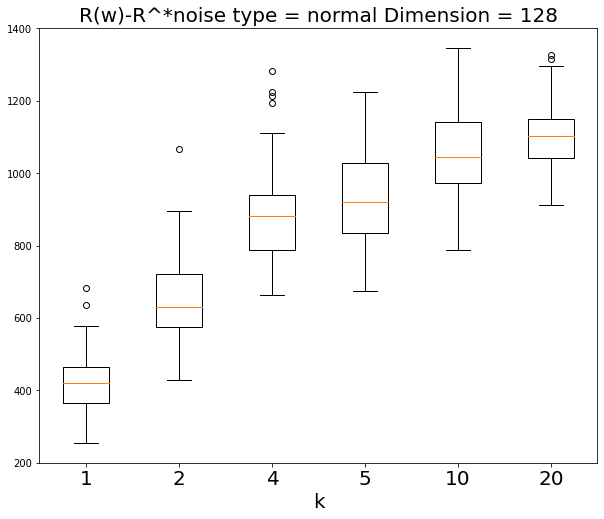

In [15]:
E_var = 1.75

w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.006)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [16]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,419.781711,650.564750,884.771738,930.326614,1059.417667,1103.898358
std,80.110563,113.334161,127.061932,115.952545,111.999975,96.568569
min,254.591080,428.563293,662.696288,675.672946,787.471394,911.289815
25%,364.927429,574.106282,789.164823,834.783906,973.700894,1041.745515
50%,419.353973,631.731307,882.449840,921.648189,1045.805632,1103.287902
75%,465.056530,722.704580,940.639385,1028.181402,1141.026365,1150.869351
max,683.673258,1066.494110,1283.065348,1224.810434,1346.942176,1327.298948


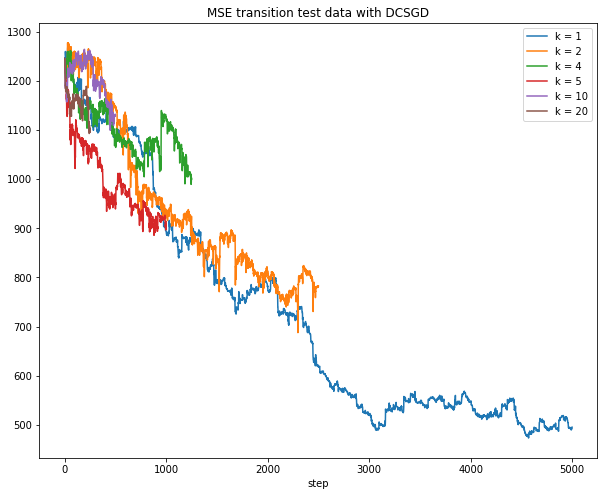

In [17]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)